In [2]:
# Packages
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
# Data (Just load and split the data set instead...)
x_train = tf.cast(tf.reshape(tf.transpose(pd.read_csv('xTrain1.csv', header=None)), shape=[-1, 28, 28, 1]), tf.float32)
x_valid = tf.cast(tf.reshape(tf.transpose(pd.read_csv('xValid1.csv', header=None)), shape=[-1, 28, 28, 1]), tf.float32)
x_test = tf.cast(tf.reshape(tf.transpose(pd.read_csv('xTest1.csv', header=None)), shape=[-1, 28, 28, 1]), tf.float32)

t_train = tf.transpose(pd.read_csv('tTrain1.csv', header=None))
t_valid = tf.transpose(pd.read_csv('tValid1.csv', header=None))
t_test = tf.transpose(pd.read_csv('tTest1.csv', header=None))


In [9]:
# Network 1: Train

# Model definition
filters = 20
kernel_size = (5, 5)
input_shape = (28, 28, 1)
mean = 0
stddev = 0.01

narrow_normal = tf.keras.initializers.RandomNormal(mean=mean, stddev=stddev)

model = tf.keras.models.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=1),
    tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, input_shape = input_shape, activation='relu', kernel_initializer=narrow_normal),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer=narrow_normal),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=narrow_normal)
])

# Model compilation
momentum = 0.9
learning_rate = 0.01

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
    metrics=['accuracy'],
)

# Model fit
epochs = 60
batch_size = 128 #8192
validation_freq = 1 #30
patience = 5

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)

history = model.fit(
    x=x_train,
    y=t_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_valid, t_valid),
    validation_freq=validation_freq,
    callbacks=[early_stopping]
)

model.save("network1")

with open('network1/assets/history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Epoch 1/60
782/782 [==============================] - 8s 10ms/step - loss: 0.8940 - accuracy: 0.6872 - val_loss: 0.2233 - val_accuracy: 0.9292
Epoch 2/60
782/782 [==============================] - 8s 10ms/step - loss: 0.1670 - accuracy: 0.9478 - val_loss: 0.1990 - val_accuracy: 0.9354
Epoch 3/60
782/782 [==============================] - 8s 10ms/step - loss: 0.1096 - accuracy: 0.9655 - val_loss: 0.0906 - val_accuracy: 0.9736
Epoch 4/60
782/782 [==============================] - 7s 10ms/step - loss: 0.0751 - accuracy: 0.9764 - val_loss: 0.0781 - val_accuracy: 0.9774
Epoch 5/60
782/782 [==============================] - 8s 10ms/step - loss: 0.0569 - accuracy: 0.9821 - val_loss: 0.0688 - val_accuracy: 0.9778
Epoch 6/60
782/782 [==============================] - 8s 10ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0614 - val_accuracy: 0.9805
Epoch 7/60
782/782 [==============================] - 8s 10ms/step - loss: 0.0379 - accuracy: 0.9885 - val_loss: 0.0542 - val_accuracy: 0.9829

In [10]:

print("Evaluate on test data")
results = model.evaluate(x_test, t_test, batch_size=128)
print("test loss, test acc:", results)


Evaluate on test data
79/79 [==============================] - 1s 7ms/step - loss: 0.0480 - accuracy: 0.9895
test loss, test acc: [0.04804355651140213, 0.9894999861717224]


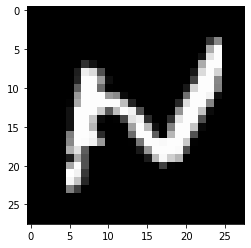

In [51]:
# Plot + LOAD MODEL 
sample = 0
image = x_train[sample] # plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [78]:
# Network 2: Train 
 
# Model definition
filters_1 = 20
filters_2 = 30
filters_3 = 50
kernel_size = (3, 3)
mean = 0
stddev = 0.01

narrow_normal = tf.keras.initializers.RandomNormal(mean=mean, stddev=stddev)

model = tf.keras.models.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=1),
    tf.keras.layers.Conv2D(filters=filters_1, kernel_size=kernel_size, activation='relu', kernel_initializer=narrow_normal),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.ZeroPadding2D(padding=1),
    tf.keras.layers.Conv2D(filters=filters_2, kernel_size=kernel_size, activation='relu', kernel_initializer=narrow_normal),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.ZeroPadding2D(padding=1),
    tf.keras.layers.Conv2D(filters=filters_3, kernel_size=kernel_size, activation='relu', kernel_initializer=narrow_normal),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=narrow_normal)
])

# Model compilation
momentum = 0.9
learning_rate = 0.01

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
    metrics=['accuracy'],
)

# Model fit
epochs = 30
batch_size = 8192
validation_freq = 30
patience = 5

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patience)

model.fit(
    x=x_train,
    y=t_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_valid, t_valid),
    validation_freq=validation_freq,
    callbacks=[early_stopping]
)

model.save("network2")

with open('network2/assets/history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/30
7/7 [==============================] - 17s 2s/step - loss: 1.2897 - accuracy: 0.6039
Epoch 2/30
7/7 [==============================] - 18s 3s/step - loss: 0.3316 - accuracy: 0.9056
Epoch 3/30
7/7 [==============================] - 17s 2s/step - loss: 0.1951 - accuracy: 0.9438
Epoch 4/30
7/7 [==============================] - 17s 2s/step - loss: 0.1417 - accuracy: 0.9581
Epoch 5/30
7/7 [==============================] - 18s 3s/step - loss: 0.1113 - accuracy: 0.9672
Epoch 6/30
7/7 [==============================] - 17s 2s/step - loss: 0.0925 - accuracy: 0.9731
Epoch 7/30
7/7 [==============================] - 17s 2s/step - loss: 0.0806 - accuracy: 0.9762
Epoch 8/30
7/7 [==============================] - 17s 2s/step - loss: 0.0718 - accuracy: 0.9791
Epoch 9/30
7/7 [==============================] - 17s 2s/step - loss: 0.0653 - accuracy: 0.9813
Epoch 10/30
7/7 [==============================] - 17s 2s/step - loss: 0.0600 - accuracy: 0.9830
Epoch 11/30
7/7 [======================